<a href="https://colab.research.google.com/github/pcsilcan/ca/blob/master/20202/ca_20202_121_dag_shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAG shortest path

Basado en Toposort y solo sirve para DAGs

In [2]:
import math

In [1]:
def initSingleSource(G, s):
    n = len(G)
    dist = [math.inf]*n
    path = [None]*n
    dist[s] = 0

    return dist, path

In [3]:
def topoSort(G):
    def dfsVisit(u):
        if visited[u]: return
        visited[u] = True
        for v, _ in G[u]:
            if not visited[v]:
                dfsVisit(v)
        order.append(u)

    n = len(G)
    visited = [False]*n
    order = []

    for u in range(n):
        if not visited[u]:
            dfsVisit(u)

    return list(reversed(order))

In [10]:
def relax(u, v, w, dist, path):
    f = dist[u] + w
    if dist[v] > f:
        dist[v] = f
        path[v] = u

In [11]:
def dagShortestPath(G, s):
    topoOrder = topoSort(G)
    dist, path = initSingleSource(G, s)
    for u in topoOrder:
        for v, w in G[u]:
            relax(u, v, w, dist, path)

    return dist, path

In [18]:
G = [[],
     [(6, 3)],
     [(0, 1)],
     [(1, 8), (4, 3), (5, 2), (7, 7)],
     [(2, 9), (7, 3)],
     [(1, 2)],
     [],
     [(0, 2), (6, 6)]]

In [20]:
dagShortestPath(G, 3)

([8, 4, 12, 0, 3, 2, 7, 6], [7, 5, 4, None, 3, 3, 1, 4])

In [5]:
import graphviz as gv

def drawAdjListGraph(G):
    dot = gv.Digraph(strict=True)
    n = len(G)
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v), label=str(w))
    
    dot.graph_attr['rankdir'] = 'LR'
    return dot

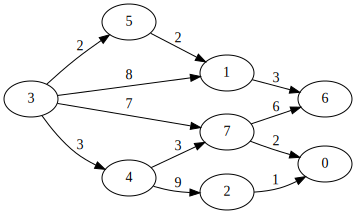

In [19]:
drawAdjListGraph(G)

In [21]:
topoSort(G)

[3, 5, 4, 7, 2, 1, 6, 0]